### 출처 : 파이썬 라이브러리를 활용한 머신러닝

Toy Data로 간단하게 수업시간에 배운 세 가지 방법에 대해 Clustering을 해보는 실습 코드입니다.     
처음부터 실행시키면서 수업시간에 배운 내용을 간단히 복습하는게 목적입니다!    
sklearn의 AgglomerativeClustering, KMeans, DBSCAN의 사용 방법에 대해 알고,     
계층적 군집화의 경우 scipy의 dendrogram, ward를 이용해 덴드로그램을 그리는 과정을 이해합니다.    
그리고 마지막 코드에서 silhouette_score로 모델을 평가하는 방식도 이해합니다.      
이를 과제 #3에 참고합니다.

In [5]:
# 오류메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
import numpy as np

# Toy Data 만들기 위해
from sklearn.datasets import make_blobs 
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import mglearn # 산점도 그래프 그리기

In [7]:
# 그래프 한글 깨짐 방지 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## Agglomerative Hierarchical Clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
X, y = make_blobs(random_state=1) # Toy Data 만들기

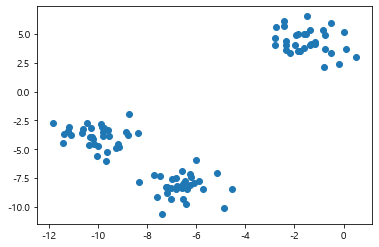

In [11]:
# make_blobs 모양 확인하기
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [13]:
y # 실제 라벨

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [14]:
agg = AgglomerativeClustering(n_clusters=3) # 계층적 군집화 모델
assignment = agg.fit_predict(X) # 모델 X에 적용해서 클러스터 예측하기
assignment

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

Text(0, 0.5, '특성 1')

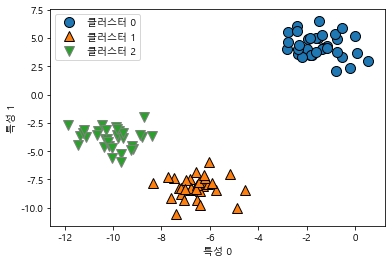

In [15]:
# 2차원 산점도 그래프 그리기(특성0, 특성1, 클러스터 예측 값)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### dendrogram, ward
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html

In [17]:
from scipy.cluster.hierarchy import dendrogram, ward # ward 방법으로 덴드로그램 그리기

In [18]:
X, y = make_blobs(random_state=0, n_samples=12) # Toy Data 만들기

In [19]:
# 데이터 배열 X 에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 리턴한다
linkage_array = ward(X)
linkage_array
# 앞에 두 숫자는 합쳐진 (개체,개체) 또는 (개체,클러스터) 
# 세 번째 숫자는 클러스터 거리, 마지막 숫자는 몇 개의 개체가 합쳐졌는지

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

Text(0, 0.5, '클러스터 거리')

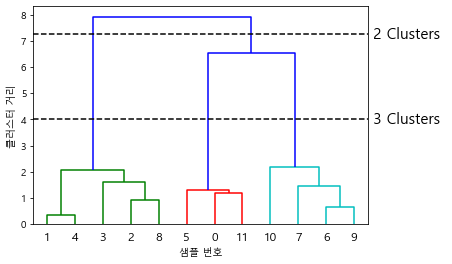

In [21]:
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그린다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')  # 2개의 클러스터가 생기는 지점
ax.plot(bounds, [4, 4], '--', c='k')  # 3개의 클러스터가 생기는 지점
ax.text(bounds[1], 7.25, ' 2 Clusters ', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 3 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

## K-means Clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [22]:
from sklearn.cluster import KMeans

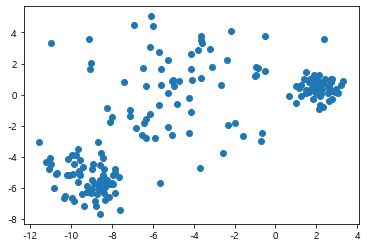

In [24]:
# Toy Data 생성
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
# varied 모양 확인하기
plt.scatter(X_varied[:, 0], X_varied[:, 1])
plt.show()

In [25]:
# KMeans 군집 모델
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

Text(0, 0.5, '특성 1')

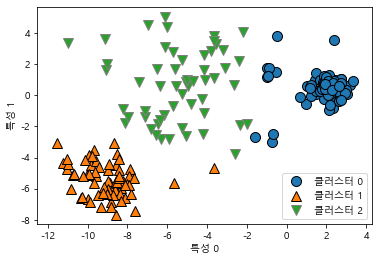

In [26]:
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

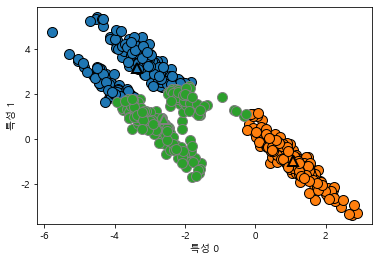

In [27]:
# 무작위로 클러스터 데이터 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 길게 늘어진 데이터로 변형
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당, 클러스터 중심
# 클러스터에 따른 산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o') 
# 클러스터 중심 그리기
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

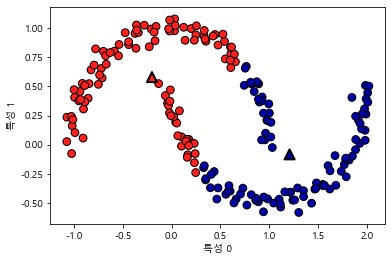

In [13]:
# two_moons 데이터 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


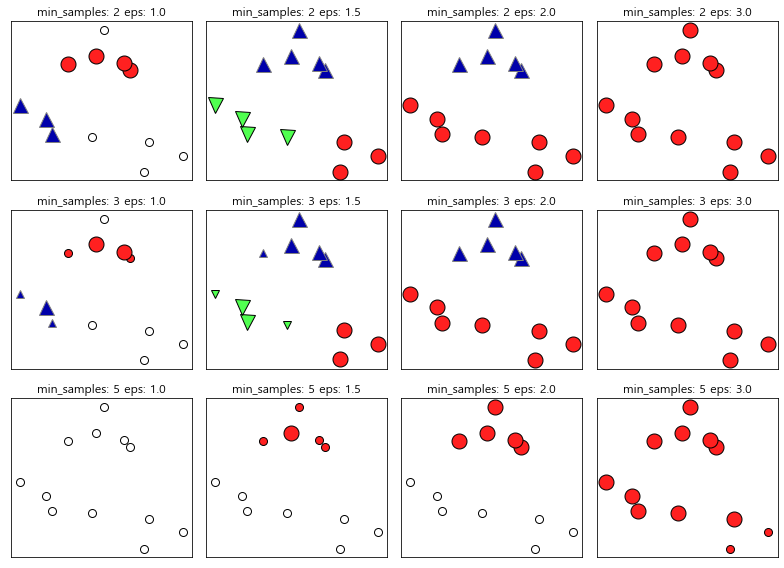

In [29]:
# https://github.com/amueller/mglearn/blob/master/mglearn/plot_dbscan.py
mglearn.plots.plot_dbscan() 
# min_samples와 eps 변화에 따라 클러스터 모양의 변화 -> 과제 #2에 참고
# 클러스터에 속한 포인트는 색을 칠하고 Noise Ponts는 하얀색
# Core Points는 크게, Border Points는 작게

Text(0, 0.5, '특성 1')

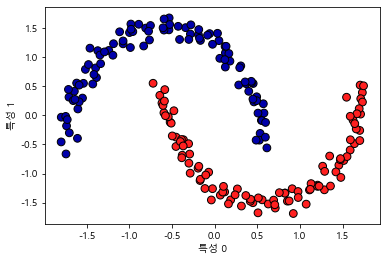

In [30]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# DBSCAN 적용
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)


# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 클러스터링 결과 비교

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

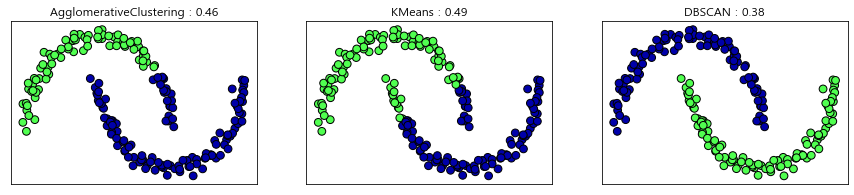

In [37]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [AgglomerativeClustering(n_clusters=2), KMeans(n_clusters=2), DBSCAN()]

# ax와 알고리즘을 선택해 해당 ax 부분에 그래프와 silhouette_score를 나타냅니다.
for ax, algorithm in zip(axes, algorithms):
    # 선택된 알고리즘으로 cluster를 예측
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))
# silhouette_score는 (X 개체들, cluster 예측 결과)를 통해 구할 수 있음